<a href="https://colab.research.google.com/github/ramankumar-1/bmiclassifier/blob/main/bmiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #20BCE1935 Raman Kumar
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sb 
import sys
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
d1=pd.read_csv('/content/drive/MyDrive/DAC-Club/bmi.csv')
d1

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


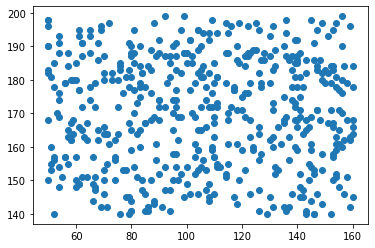

In [4]:
plt.scatter(d1['Weight'],d1['Height'])

In [5]:
#The Target Variable will be the BMI Index (Range -> 0-5). It will predict on the basis of Height, Weight &Gender. 
x=d1.iloc[:,[1,2]].values #Prediction from Weight and Height (Not taking the Age)
y=d1.iloc[:,3].values

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[-0.16389443 -0.62057619]
 [-1.14866783  1.47169171]
 [ 0.82087897  1.35040082]
 [ 0.02075058 -1.59090333]
 [ 1.06707232  0.98652814]
 [-0.04079776 -0.25670351]
 [-0.34853944 -0.71154436]
 [-0.77937781  0.13749189]
 [ 0.45158895  0.34975095]
 [ 1.31326567 -0.80251253]]


In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [10]:
#Now Since the Model is trained we will test it on Test data
y_Predicted = classifier.predict(xtest)

In [11]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_Predicted)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 0  3  1  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0 13  3  0  0]
 [ 0  0  2 13  8  0]
 [ 0  0  0  0 42  4]
 [ 0  0  0  0  1 56]]


In [12]:
#Calculating the Accuracy of this Model:-
from sklearn.metrics import accuracy_score
print ("Accuracy of Model -> ", accuracy_score(ytest, y_Predicted))

Accuracy of Model ->  0.8266666666666667


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

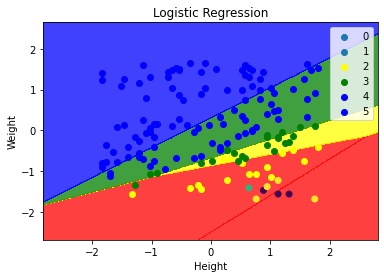

In [18]:
#Creating Color map to better visualise the accuracy of model:-
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'orange','yellow','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange','yellow','green','blue'))(i), label = j)
	
plt.title('Logistic Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()